In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                                                                                                       
from matplotlib import pyplot as plt

In [2]:
# customer_data = pd.read_csv('../dane/credit_scoring_kaggle/train.csv', sep=',')
# customer_data = pd.read_excel('../dane/credit_scoring_kaggle/train_cleaned.xlsx')
customer_data = pd.read_csv('../data/Lending Club Loan Data/X.csv')
target = pd.read_csv('../data/Lending Club Loan Data/target.csv')
customer_data['target'] = target['y']
pd.options.display.max_columns = None
customer_data.head(10)

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,mths_since_last_delinq,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_open_trades_in_6mths,num_installment_acc_op_in_12mths,num_installment_acc_op_in_24mths,mths_since_last_installment_acc_op,num_rev_trades_op_in_12mths,num_rev_trades_op_in_24mths,max_bal_owed,bal_to_cred_lim,num_inq,num_inq_in_12mths,mths_since_recent_bankcard_delinq,mths_since_recent_revol_delinq,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,2500,13.56,84.92,C1,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,NY,18.24,0,1,NaN,9,1,4341,10.3,34,w,2386.02,167.02,113.98,53.04,0.0,2.0,1.0,2.0,2.0,2.0,7.0,2137.0,28.0,1.0,2,NaN,NaN,Cash,36,Dec,2018,1,Apr,2001,0
1,30000,18.94,777.23,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,LA,26.52,0,0,71.0,13,1,12315,24.2,44,w,29387.75,1507.11,612.25,894.86,0.0,4.0,2.0,3.0,3.0,4.0,5.0,998.0,57.0,2.0,2,NaN,NaN,Cash,60,Dec,2018,7,Jun,1987,0
2,5000,17.97,180.69,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,MI,10.51,0,0,NaN,8,0,4599,19.1,13,w,4787.21,353.89,212.79,141.10,0.0,0.0,0.0,2.0,14.0,0.0,2.0,0.0,35.0,1.0,0,NaN,NaN,Cash,36,Dec,2018,4,Apr,2011,0
3,4000,18.94,146.51,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,WA,16.74,0,0,NaN,10,0,5468,78.1,13,w,3831.93,286.71,168.07,118.64,0.0,1.0,3.0,5.0,5.0,0.0,0.0,3761.0,70.0,2.0,3,NaN,NaN,Cash,36,Dec,2018,9,Feb,2006,0
4,30000,16.14,731.78,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,MD,26.35,0,0,NaN,12,0,829,3.6,26,w,29339.02,1423.21,660.98,762.23,0.0,3.0,3.0,5.0,4.0,2.0,4.0,516.0,54.0,1.0,0,NaN,NaN,Cash,60,Dec,2018,2,Dec,2000,0
5,5550,15.02,192.45,C3,Director COE,10+ years,MORTGAGE,152500.0,Not Verified,credit_card,IN,37.94,0,3,NaN,18,0,53854,48.1,44,w,5302.50,377.95,247.50,130.45,0.0,1.0,2.0,3.0,4.0,1.0,4.0,17584.0,58.0,2.0,6,NaN,NaN,Cash,36,Dec,2018,4,Sep,2002,0
6,2000,17.97,72.28,D1,Account Manager,4 years,RENT,51000.0,Source Verified,debt_consolidation,IL,2.40,0,1,NaN,1,0,0,0.0,9,w,1914.71,141.56,85.29,56.27,0.0,0.0,2.0,3.0,7.0,0.0,1.0,0.0,100.0,0.0,1,NaN,NaN,Cash,36,Dec,2018,6,Nov,2004,0
7,6000,13.56,203.79,C1,Assistant Director,10+ years,RENT,65000.0,Source Verified,credit_card,IN,30.10,0,0,NaN,19,0,38476,69.3,37,w,5864.01,201.53,135.99,65.54,0.0,0.0,0.0,1.0,23.0,0.0,2.0,9413.0,74.0,1.0,0,NaN,NaN,DirectPay,36,Dec,2018,4,Nov,1997,0
8,5000,17.97,180.69,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,debt_consolidation,FL,21.16,0,1,32.0,8,0,8018,35.2,38,w,4786.79,353.89,213.21,140.68,0.0,5.0,5.0,5.0,3.0,1.0,6.0,3132.0,73.0,2.0,4,33.0,32.0,Cash,36,Dec,2018,3,Aug,1998,0
9,6000,14.47,206.44,C2,NaN,< 1 year,OWN,300000.0,Not Verified,debt_consolidation,CT,17.43,1,1,17.0,38,0,65950,49.8,58,w,5730.20,405.64,269.80,135.84,0.0,1.0,1.0,3.0,7.0,1.0,12.0,15926.0,48.0,2.0,2,NaN,17.0,Cash,36,Dec,2018,0,Apr,2002,0


### We have 2 139 643 records and 46 columns

In [3]:
customer_data.shape

(2139643, 46)

Data is inbalanced, around 13 % of data refer to the non-default case (0), other refer to default case (1)

In [4]:
from sklearn.model_selection import train_test_split
customer_data, _ = train_test_split(customer_data, train_size=0.5, stratify=customer_data['target'], random_state=68)
customer_data['target'].value_counts()

target
0    929963
1    139858
Name: count, dtype: int64

### Dropping columns with many NaN values

In [5]:
customer_data.isna().sum()

funded_amnt                                0
interest_rate                              0
monthly_payment                            0
grade                                      0
emp_title                              74306
emp_length                             65173
home_ownership_status                      0
annual_income                              0
verification_status                        0
loan_purpose                               0
addr_state                                 0
dept_paym_income_ratio                     0
num_30+_delinq_in_2yrs                     0
num_inq_in_6mths                           0
mths_since_last_delinq                545238
num_open_credit_lines                      0
num_derogatory_pub_rec                     0
total_credit_revolving_bal                 0
used_credit_share                          0
tot_num_credit_lines                       0
initial_list_status                        0
remaining_princ_for_tot_amnt_fund          0
paym_rec_f

In [6]:
major_nans_in_columns = customer_data.isna().sum() > 100000
customer_data = customer_data.loc[:, ~major_nans_in_columns]

In [7]:
customer_data = customer_data.dropna().reset_index(drop=True)
customer_data.shape

(995127, 34)

In [8]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,40000,11.55,880.71,B4,Police Sergeant,10+ years,MORTGAGE,150000.0,Source Verified,debt_consolidation,IL,17.14,0,0,15,0,72044,54.8,24,w,36953.25,5232.930000,3046.75,2186.18,0.00,2,DirectPay,60,Aug,2018,6,Jun,2002,0
1,15000,17.57,377.41,D4,Registered Nurse,5 years,MORTGAGE,136000.0,Source Verified,major_purchase,WA,10.79,0,1,11,0,9479,54.8,21,w,0.00,13266.110000,6384.49,5667.07,18.87,1,Cash,60,Apr,2015,9,Feb,2000,1
2,25000,13.59,849.48,C2,aircraft mechanic,6 years,RENT,95000.0,Not Verified,debt_consolidation,NJ,10.73,0,1,13,0,23550,79.8,19,w,18405.07,9950.720000,6594.93,3313.32,42.47,2,Cash,36,Sep,2017,0,Nov,2006,1
3,2500,12.62,83.78,C1,Contract specialist,10+ years,MORTGAGE,97655.0,Source Verified,debt_consolidation,MD,23.53,4,1,24,0,6761,32.7,50,w,1367.76,1533.560000,1132.24,386.32,15.00,2,Cash,36,Aug,2017,2,Apr,1996,0
4,9000,14.65,310.45,C2,Pathmark,5 years,RENT,50000.0,Not Verified,debt_consolidation,NY,2.50,0,2,5,0,8409,46.5,6,f,0.00,11129.360006,9000.00,2129.36,0.00,2,Cash,36,Jun,2012,1,Sep,2007,0


In [9]:
(customer_data['funded_amnt'].value_counts().index.min(),
customer_data['funded_amnt'].value_counts().index.max())

(500, 40000)

In [10]:
# customer_data["Score_point"].value_counts()

In [11]:
# customer_data["Credit_Score"].value_counts()

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995127 entries, 0 to 995126
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   funded_amnt                        995127 non-null  int64  
 1   interest_rate                      995127 non-null  float64
 2   monthly_payment                    995127 non-null  float64
 3   grade                              995127 non-null  object 
 4   emp_title                          995127 non-null  object 
 5   emp_length                         995127 non-null  object 
 6   home_ownership_status              995127 non-null  object 
 7   annual_income                      995127 non-null  float64
 8   verification_status                995127 non-null  object 
 9   loan_purpose                       995127 non-null  object 
 10  addr_state                         995127 non-null  object 
 11  dept_paym_income_ratio             9951

In [13]:
"""describe numeric data"""
pd.set_option('display.float_format', '{:.2f}'.format)
numerical_data = customer_data.select_dtypes(["int32", "float32", "int64", "float64"]).dropna()
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,issue_date_year,region_code,earliest_cr_line_year,target
count,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00
mean,14986.37,13.06,444.42,80694.75,18.04,0.32,0.59,11.73,0.19,16859.35,50.80,24.38,3974.09,12265.16,9672.59,2447.72,1.48,1.50,42.90,2015.74,4.65,1999.69,0.13
std,9058.39,4.80,263.92,135374.54,8.37,0.89,0.90,5.67,0.57,23253.44,24.62,12.04,7082.87,9983.78,8368.74,2714.76,11.64,2.05,10.86,1.79,3.11,7.54,0.34
min,500.00,5.31,4.93,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,2007.00,0.00,1933.00,0.00
25%,8000.00,9.49,253.70,49000.00,11.78,0.00,0.00,8.00,0.00,6100.00,32.10,16.00,0.00,4631.71,3067.88,718.25,0.00,0.00,36.00,2015.00,2.00,1996.00,0.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11503.00,50.80,23.00,0.00,9614.36,7212.11,1528.66,0.00,1.00,36.00,2016.00,4.00,2001.00,0.00
75%,20000.00,15.80,588.54,95406.00,23.92,0.00,1.00,15.00,0.00,20455.00,69.80,31.00,5663.61,17250.66,14003.42,3130.72,0.00,2.00,60.00,2017.00,8.00,2005.00,0.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,86.00,2904836.00,892.30,165.00,40000.00,62948.99,40000.00,27948.99,1427.25,41.00,60.00,2018.00,9.00,2015.00,1.00
unique,1564.00,660.00,75774.00,47329.00,4648.00,30.00,23.00,84.00,33.00,78952.00,1292.00,139.00,190011.00,795609.00,270557.00,439232.00,10886.00,41.00,2.00,12.00,10.00,72.00,2.00
var_coeff [%],60.44,36.72,59.38,167.76,46.41,280.20,152.23,48.30,295.22,137.93,48.46,49.39,178.23,81.40,86.52,110.91,784.46,136.95,25.32,0.09,66.87,0.38,259.83


In [14]:
credit_history_col_index = customer_data.columns.to_list().index('issue_date_year') + 1
customer_data.insert(credit_history_col_index, 'credit_history_age', customer_data['issue_date_year'] - customer_data['earliest_cr_line_year'])
customer_data = customer_data.drop(columns=['issue_date_month', 'issue_date_year', 'earliest_cr_line_month', 'earliest_cr_line_year'])

In [15]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,40000,11.55,880.71,B4,Police Sergeant,10+ years,MORTGAGE,150000.00,Source Verified,debt_consolidation,IL,17.14,0,0,15,0,72044,54.80,24,w,36953.25,5232.93,3046.75,2186.18,0.00,2,DirectPay,60,16,6,0
1,15000,17.57,377.41,D4,Registered Nurse,5 years,MORTGAGE,136000.00,Source Verified,major_purchase,WA,10.79,0,1,11,0,9479,54.80,21,w,0.00,13266.11,6384.49,5667.07,18.87,1,Cash,60,15,9,1
2,25000,13.59,849.48,C2,aircraft mechanic,6 years,RENT,95000.00,Not Verified,debt_consolidation,NJ,10.73,0,1,13,0,23550,79.80,19,w,18405.07,9950.72,6594.93,3313.32,42.47,2,Cash,36,11,0,1
3,2500,12.62,83.78,C1,Contract specialist,10+ years,MORTGAGE,97655.00,Source Verified,debt_consolidation,MD,23.53,4,1,24,0,6761,32.70,50,w,1367.76,1533.56,1132.24,386.32,15.00,2,Cash,36,21,2,0
4,9000,14.65,310.45,C2,Pathmark,5 years,RENT,50000.00,Not Verified,debt_consolidation,NY,2.50,0,2,5,0,8409,46.50,6,f,0.00,11129.36,9000.00,2129.36,0.00,2,Cash,36,5,1,0


In [16]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,credit_history_age,region_code,target
count,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00
mean,14986.37,13.06,444.42,80694.75,18.04,0.32,0.59,11.73,0.19,16859.35,50.80,24.38,3974.09,12265.16,9672.59,2447.72,1.48,1.50,42.90,16.06,4.65,0.13
std,9058.39,4.80,263.92,135374.54,8.37,0.89,0.90,5.67,0.57,23253.44,24.62,12.04,7082.87,9983.78,8368.74,2714.76,11.64,2.05,10.86,7.35,3.11,0.34
min,500.00,5.31,4.93,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,0.00,0.00,0.00
25%,8000.00,9.49,253.70,49000.00,11.78,0.00,0.00,8.00,0.00,6100.00,32.10,16.00,0.00,4631.71,3067.88,718.25,0.00,0.00,36.00,11.00,2.00,0.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11503.00,50.80,23.00,0.00,9614.36,7212.11,1528.66,0.00,1.00,36.00,15.00,4.00,0.00
75%,20000.00,15.80,588.54,95406.00,23.92,0.00,1.00,15.00,0.00,20455.00,69.80,31.00,5663.61,17250.66,14003.42,3130.72,0.00,2.00,60.00,20.00,8.00,0.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,86.00,2904836.00,892.30,165.00,40000.00,62948.99,40000.00,27948.99,1427.25,41.00,60.00,83.00,9.00,1.00
unique,1564.00,660.00,75774.00,47329.00,4648.00,30.00,23.00,84.00,33.00,78952.00,1292.00,139.00,190011.00,795609.00,270557.00,439232.00,10886.00,41.00,2.00,72.00,10.00,2.00
var_coeff [%],60.44,36.72,59.38,167.76,46.41,280.20,152.23,48.30,295.22,137.93,48.46,49.39,178.23,81.40,86.52,110.91,784.46,136.95,25.32,45.80,66.87,259.83


In [17]:
categorical_data = customer_data.select_dtypes(["object"]).dropna().reset_index(drop=True)
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method
count,995127,995127,995127,995127,995127,995127,995127,995127,995127
unique,35,290105,11,4,3,14,51,2,2
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash
freq,64047,17474,355359,482945,410208,564090,140702,666041,961778


In [18]:
# (categoric_data["Amount_invested_monthly"].value_counts(),
# categoric_data["Monthly_Balance"].value_counts())

In [19]:
# categoric_data["ID"].value_counts()

In [20]:
(numerical_data.columns.size, categorical_data.columns.size)

(22, 9)

In [21]:
"""adjusting number of rows for subplot"""
def subplot_shape(df, subplot_cols=3):
    df_ncols = df.columns.size
    if df_ncols %subplot_cols == 0:
        return (int(df_ncols / subplot_cols), subplot_cols)
    else:
        return (df_ncols // subplot_cols + df_ncols % subplot_cols, subplot_cols)

"""function to draw distributions for variables (columns)"""
def draw_distribution(df, subplot_size, distributions_for_numerics=True, subplot_cols=3, barplot_max_cols=20, top_n_freq=5):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    distribution_type = {}
    keys = df.columns.values
    distribution_type = distribution_type.fromkeys(keys)

    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        top_frequent = ''
        data = df[col].dropna().reset_index(drop=True)
        val_counts = data.value_counts()
        if data.dtype == 'object':
            if len(val_counts.index) <= barplot_max_cols / 2:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
            else:
                top_frequent = f" - TOP {top_n_freq} categories"
                sns.barplot(x=val_counts.index[0:top_n_freq], y=val_counts.values[0:top_n_freq], ax=ax, edgecolor='black')
            plot_type = 'barplot'
        else:  # distributions_for_numerics:
            if len(val_counts.index) <= barplot_max_cols:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
                plot_type = 'barplot'
            else:
                sns.histplot(data=data, bins='auto', ax=ax, edgecolor='black')
                plot_type = 'histogram'
        ax.set_title(f"{col}{top_frequent}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        distribution_type[col] = plot_type
        # Counter for drawing charts process
        print(f'\rDrawing distribution plots [{iter+1}/{num_cols}]', end='', flush=True)
    for i, item in enumerate(distribution_type.items()):
        if i == 0:
            print('\n')
        print(item)
    plt.tight_layout()
    plt.show()

In [22]:
subplot_shape(numerical_data)

(8, 3)

Drawing distribution plots [31/31]

('funded_amnt', 'histogram')
('interest_rate', 'histogram')
('monthly_payment', 'histogram')
('grade', 'barplot')
('emp_title', 'barplot')
('emp_length', 'barplot')
('home_ownership_status', 'barplot')
('annual_income', 'histogram')
('verification_status', 'barplot')
('loan_purpose', 'barplot')
('addr_state', 'barplot')
('dept_paym_income_ratio', 'histogram')
('num_30+_delinq_in_2yrs', 'histogram')
('num_inq_in_6mths', 'histogram')
('num_open_credit_lines', 'histogram')
('num_derogatory_pub_rec', 'histogram')
('total_credit_revolving_bal', 'histogram')
('used_credit_share', 'histogram')
('tot_num_credit_lines', 'histogram')
('initial_list_status', 'barplot')
('remaining_princ_for_tot_amnt_fund', 'histogram')
('paym_rec_for_tot_amnt_fund', 'histogram')
('princ_rec', 'histogram')
('interest_rec', 'histogram')
('late_fees_rec', 'histogram')
('num_inq_in_12mths', 'histogram')
('disbursement_method', 'barplot')
('loan_term_months', 'barplot')
('credit_his

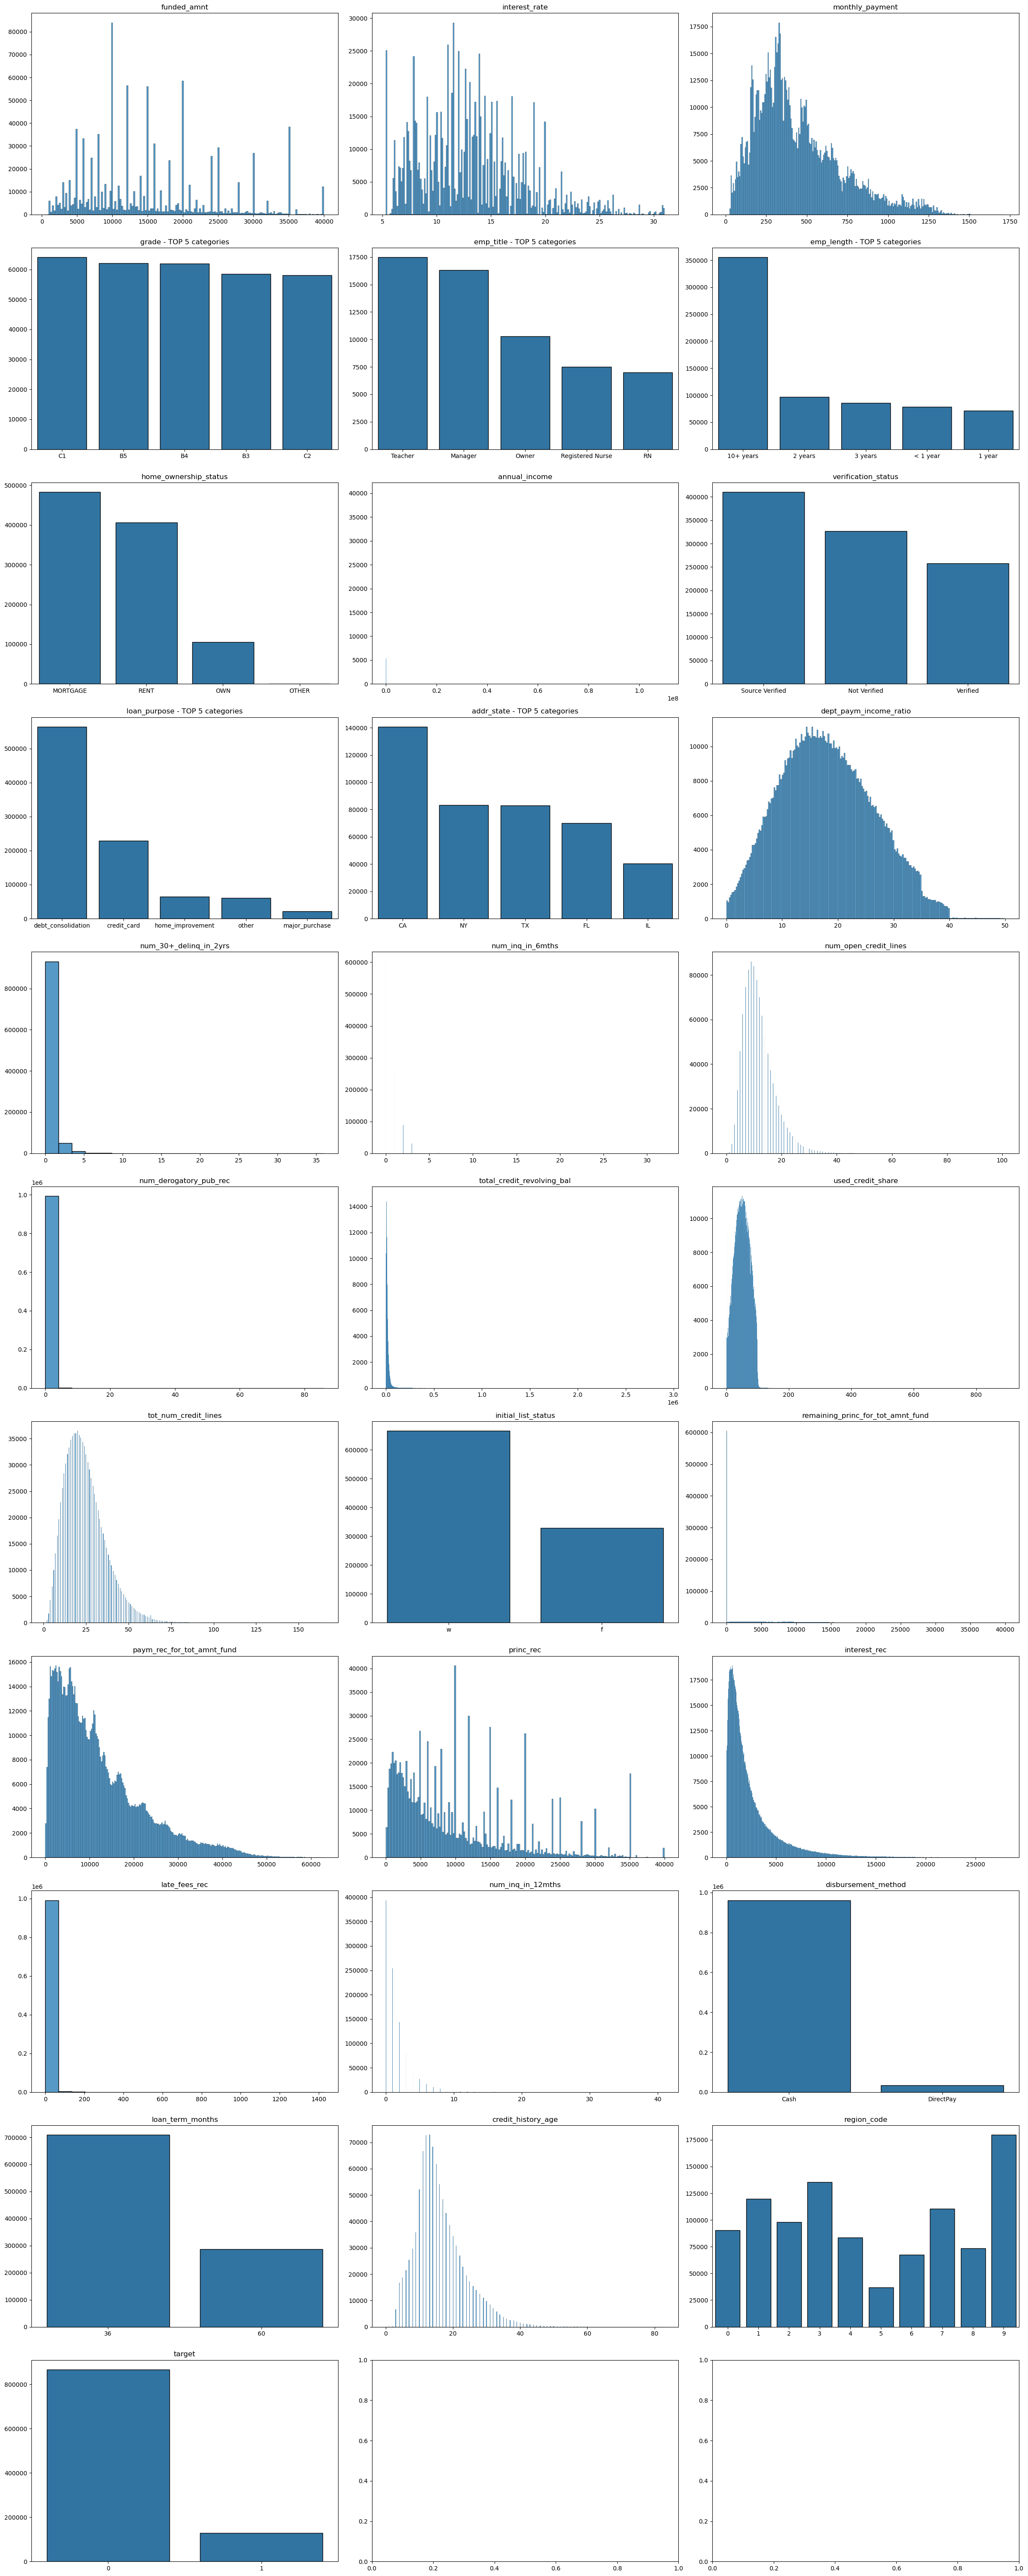

In [23]:
draw_distribution(customer_data, subplot_size=(24, 60), subplot_cols=3)

### "loan_term_months" column has only 2 values so we can treat it as category variable as well as for the "region_code" variable

In [24]:
customer_data['loan_term_months'] = customer_data['loan_term_months'].astype('object')
customer_data['region_code'] = customer_data['region_code'].astype('object')
categorical_data = customer_data.select_dtypes(['object'])
categorical_data.head()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
0,B4,Police Sergeant,10+ years,MORTGAGE,Source Verified,debt_consolidation,IL,w,DirectPay,60,6
1,D4,Registered Nurse,5 years,MORTGAGE,Source Verified,major_purchase,WA,w,Cash,60,9
2,C2,aircraft mechanic,6 years,RENT,Not Verified,debt_consolidation,NJ,w,Cash,36,0
3,C1,Contract specialist,10+ years,MORTGAGE,Source Verified,debt_consolidation,MD,w,Cash,36,2
4,C2,Pathmark,5 years,RENT,Not Verified,debt_consolidation,NY,f,Cash,36,1


Categorical and numerical statistics (after adjusting variables to the proper groups of data)

In [25]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,995127,995127,995127,995127,995127,995127,995127,995127,995127,995127,995127
unique,35,290105,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,64047,17474,355359,482945,410208,564090,140702,666041,961778,709041,179663


In [26]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target
0,40000,11.55,880.71,150000.00,17.14,0,0,15,0,72044,54.80,24,36953.25,5232.93,3046.75,2186.18,0.00,2,16,0
1,15000,17.57,377.41,136000.00,10.79,0,1,11,0,9479,54.80,21,0.00,13266.11,6384.49,5667.07,18.87,1,15,1
2,25000,13.59,849.48,95000.00,10.73,0,1,13,0,23550,79.80,19,18405.07,9950.72,6594.93,3313.32,42.47,2,11,1
3,2500,12.62,83.78,97655.00,23.53,4,1,24,0,6761,32.70,50,1367.76,1533.56,1132.24,386.32,15.00,2,21,0
4,9000,14.65,310.45,50000.00,2.50,0,2,5,0,8409,46.50,6,0.00,11129.36,9000.00,2129.36,0.00,2,5,0


In [27]:
numerical_data_describe = numerical_data.loc[:, numerical_data.columns != 'target'].describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe.loc['median'] = numerical_data.median()
numerical_data_describe.loc['skew'] = numerical_data.skew()
numerical_data_describe.loc['kurtosis'] = numerical_data.kurtosis()
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age
count,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00,995127.00
mean,14986.37,13.06,444.42,80694.75,18.04,0.32,0.59,11.73,0.19,16859.35,50.80,24.38,3974.09,12265.16,9672.59,2447.72,1.48,1.50,16.06
std,9058.39,4.80,263.92,135374.54,8.37,0.89,0.90,5.67,0.57,23253.44,24.62,12.04,7082.87,9983.78,8368.74,2714.76,11.64,2.05,7.35
min,500.00,5.31,4.93,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,8000.00,9.49,253.70,49000.00,11.78,0.00,0.00,8.00,0.00,6100.00,32.10,16.00,0.00,4631.71,3067.88,718.25,0.00,0.00,11.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11503.00,50.80,23.00,0.00,9614.36,7212.11,1528.66,0.00,1.00,15.00
75%,20000.00,15.80,588.54,95406.00,23.92,0.00,1.00,15.00,0.00,20455.00,69.80,31.00,5663.61,17250.66,14003.42,3130.72,0.00,2.00,20.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,86.00,2904836.00,892.30,165.00,40000.00,62948.99,40000.00,27948.99,1427.25,41.00,83.00
unique,1564.00,660.00,75774.00,47329.00,4648.00,30.00,23.00,84.00,33.00,78952.00,1292.00,139.00,190011.00,795609.00,270557.00,439232.00,10886.00,41.00,72.00
var_coeff [%],60.44,36.72,59.38,167.76,46.41,280.20,152.23,48.30,295.22,137.93,48.46,49.39,178.23,81.40,86.52,110.91,784.46,136.95,45.80


In [28]:
"""function to determine number of outlier values in a dataframe column"""
def number_of_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

"""function for drawing boxplots"""
def draw_boxplots(df, subplot_size=(16, 10), subplot_cols=3):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    num_outliers = []
    
    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        boxplot = sns.boxplot(data=df[col], ax=ax)
        num_outliers.append( number_of_outliers(df[col]) )
        ax.set_title(col)
        ax.set_ylabel('')
        ax.grid()
        print(f'\rDrawing boxplots [{iter+1}/{num_cols}]', end='', flush=True)
    print(f'\n{num_outliers}')
    plt.tight_layout()
    plt.show()

Drawing boxplots [19/19]
[12846, 20060, 30892, 49216, 778, 189731, 43210, 25080, 153675, 60354, 55, 22758, 97627, 34832, 28441, 72347, 37799, 47487, 26264]


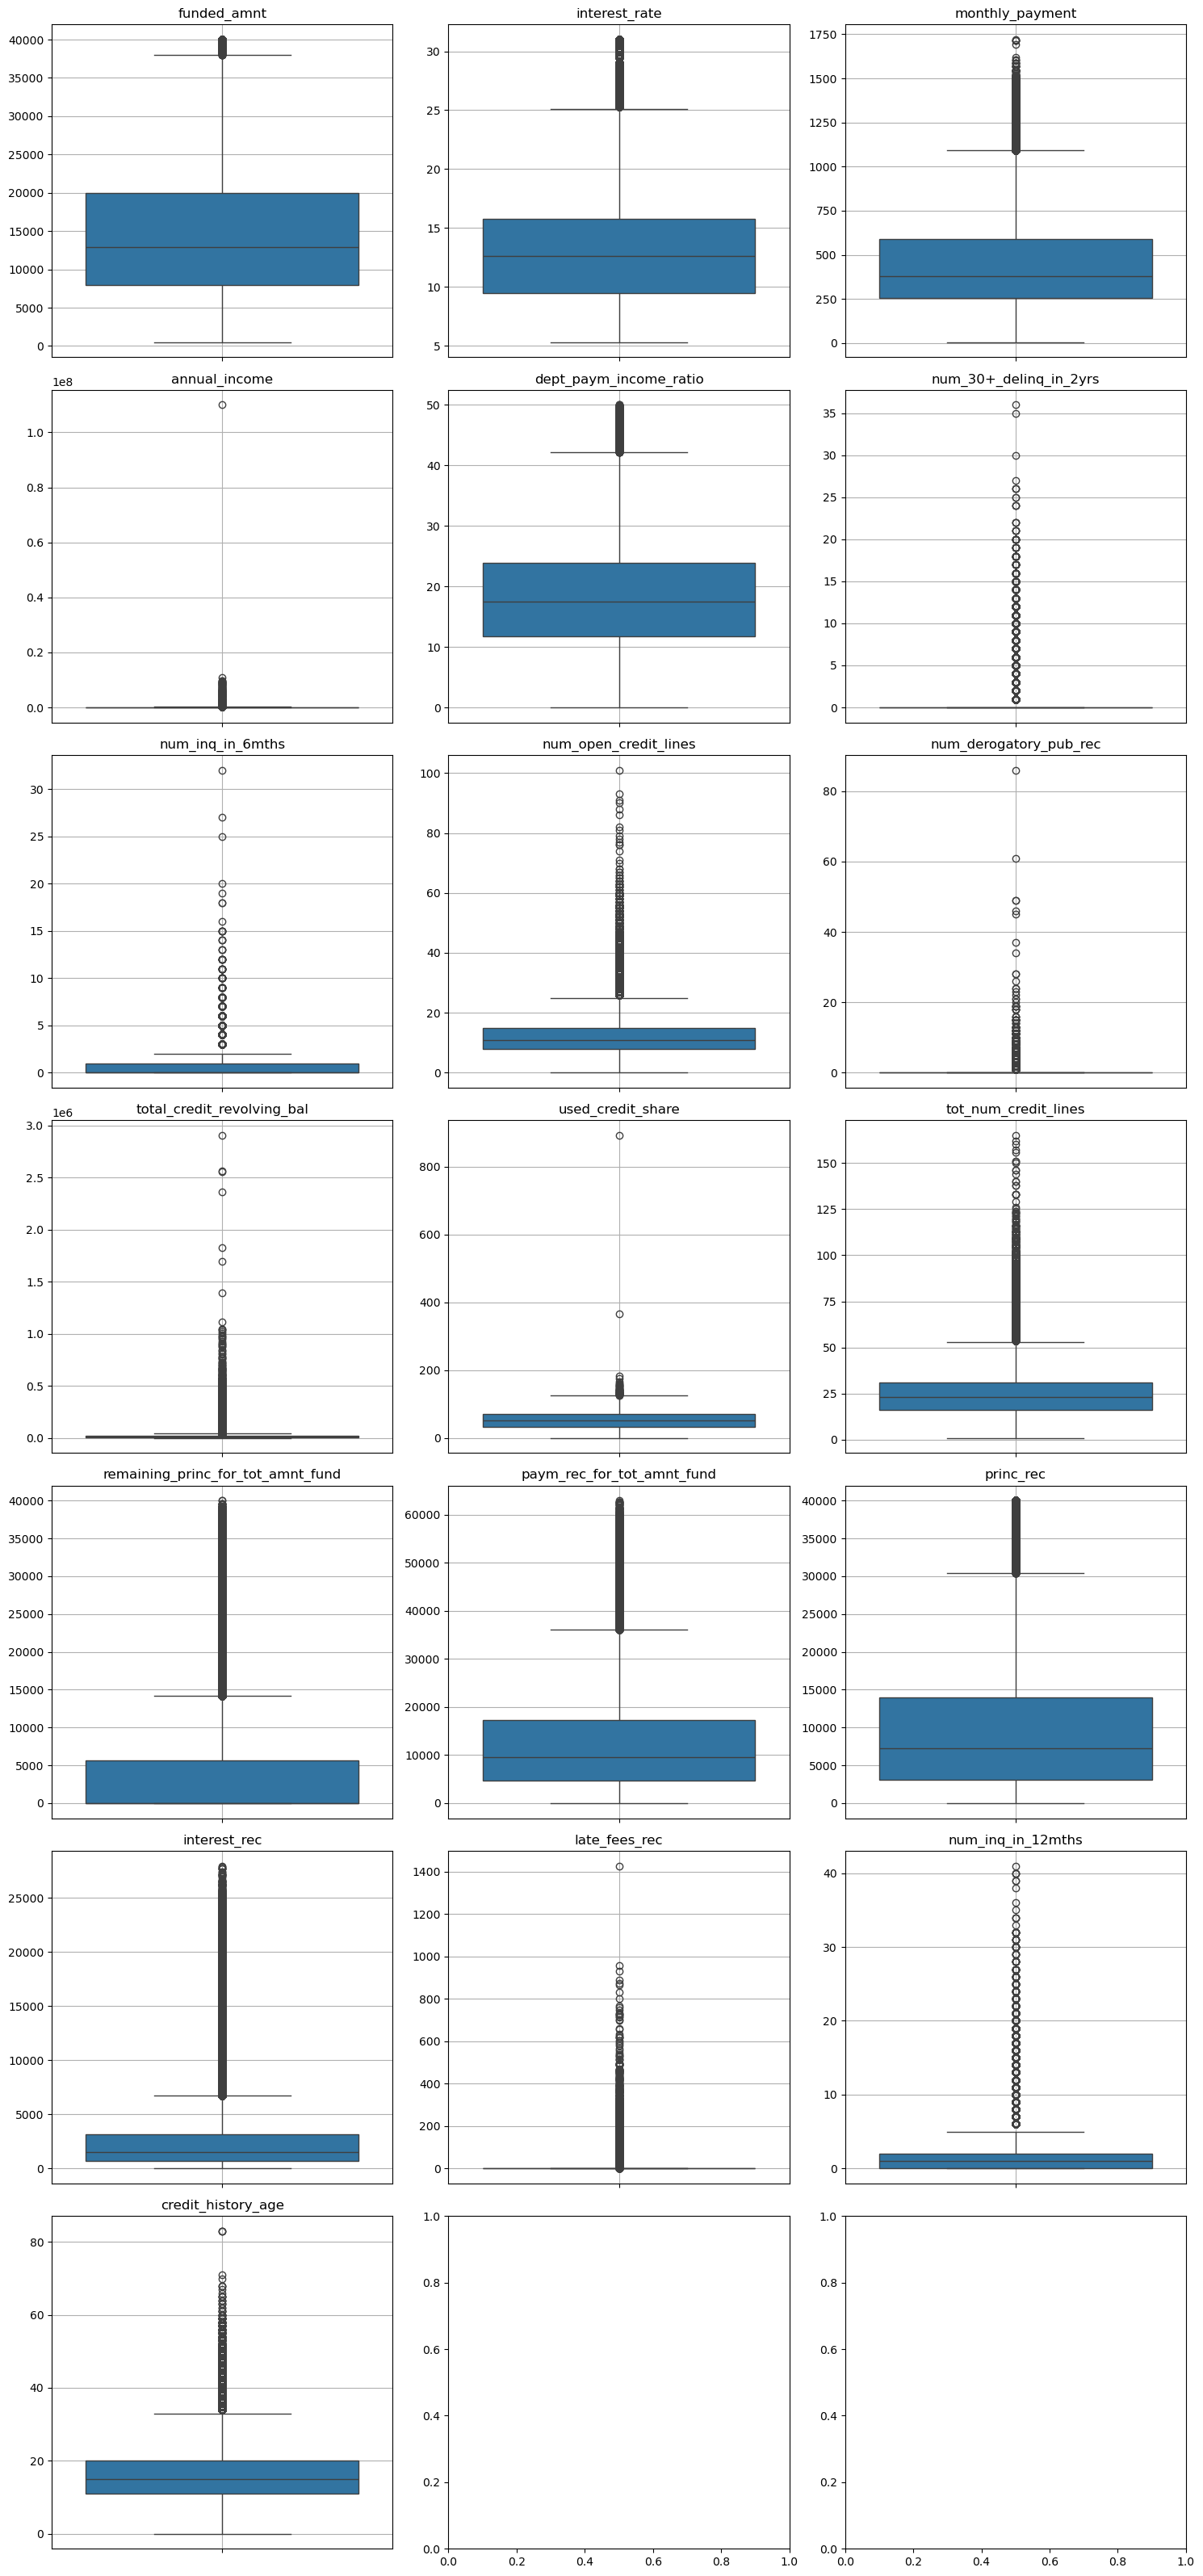

In [29]:
draw_boxplots(numerical_data.drop(columns='target'), subplot_size=(15, 32))

In [30]:
def handle_outliers(df, threshold=1.5, remove=False, replace_val='mean'):
    df_cleaned = df.copy()
    df_numeric = df_cleaned.select_dtypes(include=['int32', 'float32', 'int64', 'float64'])
    
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # data serieses for lower and upper bounds for each numeric column
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    if remove == True:
        # condition for numeric columns for handling outliers
        mask = ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
        df_cleaned_no_outliers = df_cleaned[mask]
        print(f"Customer dataframe INPUT size: {len(df_cleaned)}")
        print(f"Deleted rows containing outliers: {len(mask[mask==False])}")
        print(f"Customer dataframe OUTPUT size: {len(df_cleaned_no_outliers)}")
        return df_cleaned_no_outliers

    else:
        for col in df_numeric.columns:
            col_dtype = df_cleaned[col].dtype
            if replace_val == 'mean':
                replacement_val = df_cleaned[col].mean()
            elif replace_val == 'median':
                replacement_val = df_cleaned[col].median()

            replacement = col_dtype.type(replacement_val) # setting type of the replacement value corresponding to given column
            outlier_mask_col = ((df_cleaned[col] < lower_bound[col]) | (df_cleaned[col] > upper_bound[col]))
            df_cleaned.loc[outlier_mask_col, col] = replacement

        return df_cleaned

<Axes: >

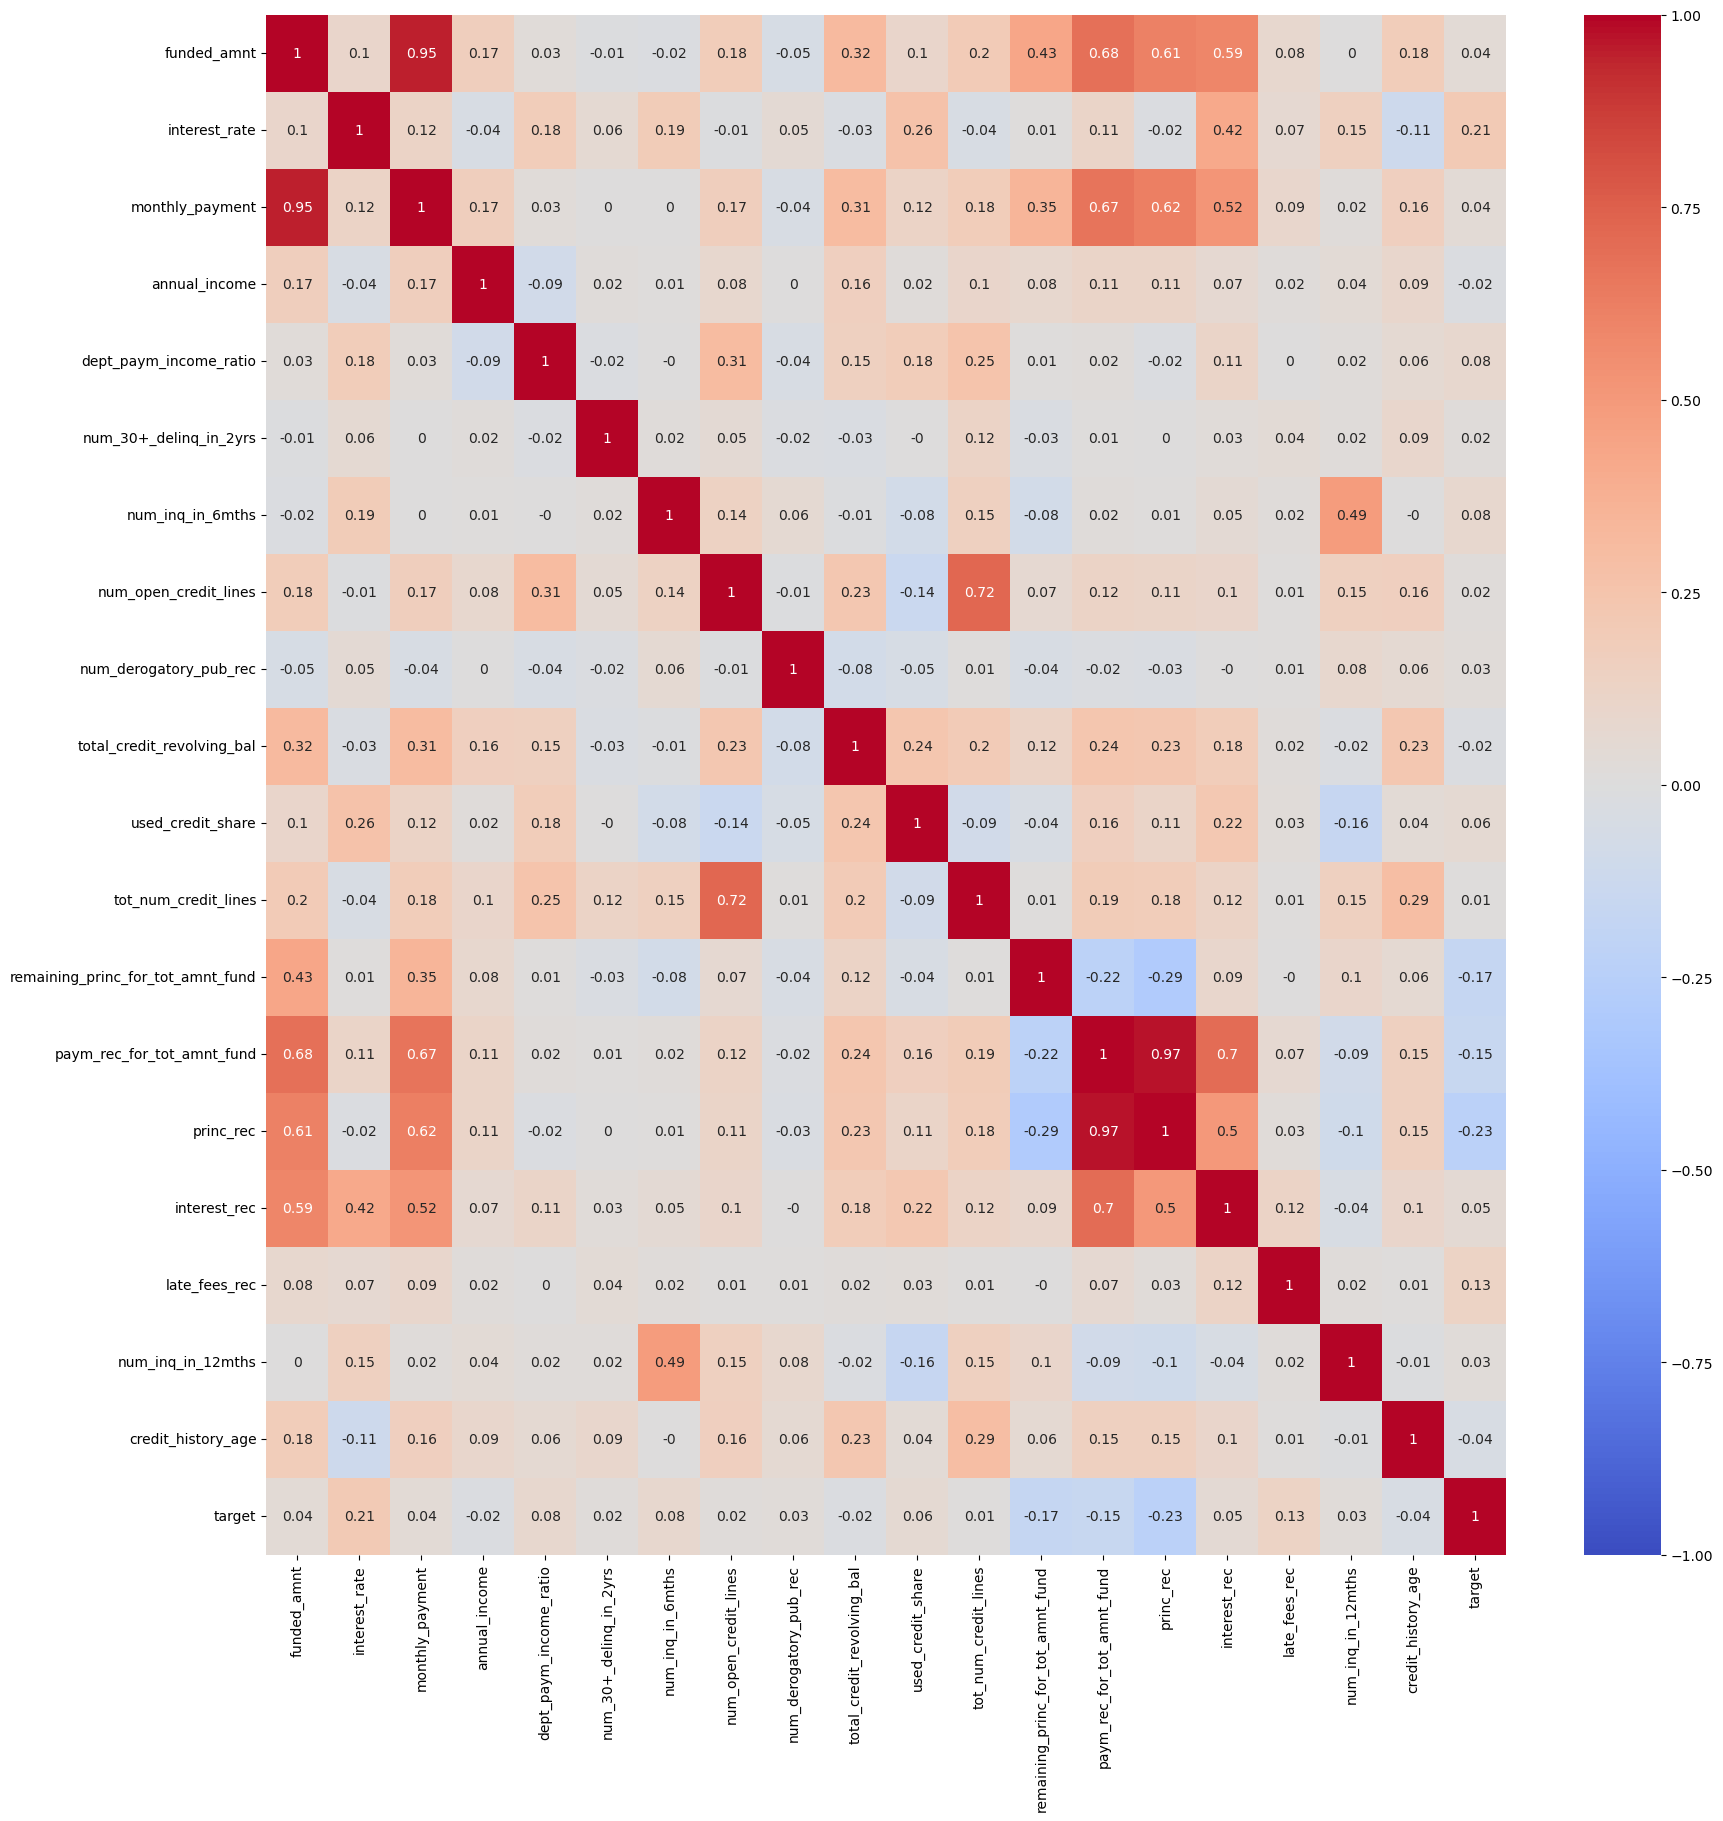

In [31]:
numeric_corr = numerical_data.corr().round(decimals=2)
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

potential columns to reject because of big correlations:
- "monthly_payment", 
- "tot_num_credit_lines"
- "paym_rec_for_tot_amnt_fund" or "princ_rec"

### VIF (Variance Inflation Factor) analysis to determine linearity degree between independent variables

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

"""creating linear models for every independent variable between other independent variables"""
def VIF(numerical_data):    
     X = numerical_data
     X = add_constant(X)

     VIFs = pd.Series(
          [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns
     )
     return VIFs

print(VIF(numerical_data.drop(columns='target')))

const                                25.69
funded_amnt                          18.56
interest_rate                         1.64
monthly_payment                      11.12
annual_income                         1.07
dept_paym_income_ratio                1.25
num_30+_delinq_in_2yrs                1.04
num_inq_in_6mths                      1.40
num_open_credit_lines                 2.28
num_derogatory_pub_rec                1.03
total_credit_revolving_bal            1.32
used_credit_share                     1.31
tot_num_credit_lines                  2.32
remaining_princ_for_tot_amnt_fund     4.94
paym_rec_for_tot_amnt_fund          305.26
princ_rec                           175.51
interest_rec                         25.07
late_fees_rec                         1.03
num_inq_in_12mths                     1.43
credit_history_age                    1.19
dtype: float64


In [33]:
"""dropping cols that have VIF > 10 because then the linearity might significantly affect quality of the model"""
numerical_data = numerical_data.drop(columns=['monthly_payment', 'princ_rec', 'interest_rec', 'tot_num_credit_lines'])
print(VIF(numerical_data.drop(columns='target')))

const                               21.72
funded_amnt                          5.83
interest_rate                        1.24
annual_income                        1.07
dept_paym_income_ratio               1.24
num_30+_delinq_in_2yrs               1.02
num_inq_in_6mths                     1.39
num_open_credit_lines                1.32
num_derogatory_pub_rec               1.03
total_credit_revolving_bal           1.31
used_credit_share                    1.30
remaining_princ_for_tot_amnt_fund    3.23
paym_rec_for_tot_amnt_fund           4.89
late_fees_rec                        1.01
num_inq_in_12mths                    1.41
credit_history_age                   1.13
dtype: float64


In [34]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,40000,11.55,880.71,B4,Police Sergeant,10+ years,MORTGAGE,150000.00,Source Verified,debt_consolidation,IL,17.14,0,0,15,0,72044,54.80,24,w,36953.25,5232.93,3046.75,2186.18,0.00,2,DirectPay,60,16,6,0
1,15000,17.57,377.41,D4,Registered Nurse,5 years,MORTGAGE,136000.00,Source Verified,major_purchase,WA,10.79,0,1,11,0,9479,54.80,21,w,0.00,13266.11,6384.49,5667.07,18.87,1,Cash,60,15,9,1
2,25000,13.59,849.48,C2,aircraft mechanic,6 years,RENT,95000.00,Not Verified,debt_consolidation,NJ,10.73,0,1,13,0,23550,79.80,19,w,18405.07,9950.72,6594.93,3313.32,42.47,2,Cash,36,11,0,1
3,2500,12.62,83.78,C1,Contract specialist,10+ years,MORTGAGE,97655.00,Source Verified,debt_consolidation,MD,23.53,4,1,24,0,6761,32.70,50,w,1367.76,1533.56,1132.24,386.32,15.00,2,Cash,36,21,2,0
4,9000,14.65,310.45,C2,Pathmark,5 years,RENT,50000.00,Not Verified,debt_consolidation,NY,2.50,0,2,5,0,8409,46.50,6,f,0.00,11129.36,9000.00,2129.36,0.00,2,Cash,36,5,1,0


In [35]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,995127,995127,995127,995127,995127,995127,995127,995127,995127,995127,995127
unique,35,290105,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,64047,17474,355359,482945,410208,564090,140702,666041,961778,709041,179663


In [36]:
customer_data = customer_data.drop(columns=['grade', 'emp_title', 'addr_state'])
customer_data.select_dtypes('object').describe()

,emp_length,home_ownership_status,verification_status,loan_purpose,initial_list_status,disbursement_method,loan_term_months,region_code
count,995127,995127,995127,995127,995127,995127,995127,995127
unique,11,4,3,14,2,2,2,10
top,10+ years,MORTGAGE,Source Verified,debt_consolidation,w,Cash,36,9
freq,355359,482945,410208,564090,666041,961778,709041,179663


Categorical values encoding using OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoric_data(df):
    """Encodes categorical columns in the DataFrame using OneHotEncoder."""
    categorical_columns = df.loc[:, df.dtypes == 'object'].columns
    encoding_values = df[categorical_columns].nunique().values
    ohe = OneHotEncoder(sparse_output=False) 
    
    # Fit and transform the categorical columns
    one_hot_encoded = ohe.fit_transform(df[categorical_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, 
                              index=df.index,
                              columns=ohe.get_feature_names_out(categorical_columns)).astype('int32')
    
    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    df_encoded = pd.concat([df, one_hot_df], axis=1)
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    
    for i, (cat_col, encoded_vals) in enumerate(zip(categorical_columns, encoding_values)):
        print(f"{i+1}) {cat_col} - encoded {encoded_vals} categories")
    
    return df_encoded

customer_data = encode_categoric_data(customer_data)

1) emp_length - encoded 11 categories
2) home_ownership_status - encoded 4 categories
3) verification_status - encoded 3 categories
4) loan_purpose - encoded 14 categories
5) initial_list_status - encoded 2 categories
6) disbursement_method - encoded 2 categories
7) loan_term_months - encoded 2 categories
8) region_code - encoded 10 categories


In [38]:
categorical_columns = customer_data.loc[:, customer_data.dtypes == 'object'].columns
customer_data

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,40000,11.55,880.71,150000.00,17.14,0,0,15,0,72044,54.80,24,36953.25,5232.93,3046.75,2186.18,0.00,2,16,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,15000,17.57,377.41,136000.00,10.79,0,1,11,0,9479,54.80,21,0.00,13266.11,6384.49,5667.07,18.87,1,15,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,25000,13.59,849.48,95000.00,10.73,0,1,13,0,23550,79.80,19,18405.07,9950.72,6594.93,3313.32,42.47,2,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,2500,12.62,83.78,97655.00,23.53,4,1,24,0,6761,32.70,50,1367.76,1533.56,1132.24,386.32,15.00,2,21,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,9000,14.65,310.45,50000.00,2.50,0,2,5,0,8409,46.50,6,0.00,11129.36,9000.00,2129.36,0.00,2,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995122,28000,8.46,883.38,412500.00,21.96,0,0,25,0,50346,45.80,49,23810.89,5287.12,4189.11,1098.01,0.00,0,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
995123,18000,7.90,563.23,86000.00,8.36,0,0,13,0,16137,42.80,26,0.00,20149.31,18000.00,2149.31,0.00,0,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
995124,6200,6.46,189.92,72100.00,13.95,0,0,4,0,7295,55.30,14,5727.84,554.18,472.16,82.02,0.00,1,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
995125,18225,19.47,672.40,130000.00,10.53,0,3,10,0,13411,85.40,20,0.00,23066.82,18225.00,4841.82,0.00,3,8,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [39]:
customer_data['target'].value_counts()

target
0    866746
1    128381
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
cols_to_transform = customer_data.loc[:, :'credit_history_age'].columns

"""creating copy of dataframe because for other methods such us Decision Trees there might not be need to scale data"""
customer_data_scaled = customer_data.copy() 
customer_data_scaled[cols_to_transform] = minmax_scaler.fit_transform( customer_data_scaled[cols_to_transform] )
customer_data_scaled.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,1.00,0.24,0.51,0.00,0.34,0.00,0.00,0.15,0.00,0.02,0.06,0.14,0.92,0.08,0.08,0.08,0.00,0.05,0.19,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.37,0.48,0.22,0.00,0.22,0.00,0.03,0.11,0.00,0.00,0.06,0.12,0.00,0.21,0.16,0.20,0.01,0.02,0.18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.62,0.32,0.49,0.00,0.21,0.00,0.03,0.13,0.00,0.01,0.09,0.11,0.46,0.16,0.16,0.12,0.03,0.05,0.13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.05,0.28,0.05,0.00,0.47,0.11,0.03,0.24,0.00,0.00,0.04,0.30,0.03,0.02,0.03,0.01,0.01,0.05,0.25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0.22,0.36,0.18,0.00,0.05,0.00,0.06,0.05,0.00,0.00,0.05,0.03,0.00,0.18,0.23,0.08,0.00,0.05,0.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0


### Logistic Regression Model

In [41]:
from sklearn import linear_model

X = customer_data_scaled.drop(columns='target')
y = customer_data_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['target'])
log_regression_model = linear_model.LogisticRegression(class_weight='balanced')

log_regression_model.fit(X_train, y_train)
y_train_probs = log_regression_model.predict_proba(X_train)
y_probs = log_regression_model.predict_proba(X_test)


(y_train_probs, y_probs)

c:\Users\Radek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[0.91186721, 0.08813279],
        [0.82835718, 0.17164282],
        [0.        , 1.        ],
        ...,
        [0.99842746, 0.00157254],
        [0.91701571, 0.08298429],
        [0.        , 1.        ]]),
 array([[8.86081807e-01, 1.13918193e-01],
        [1.04063206e-04, 9.99895937e-01],
        [9.60607958e-01, 3.93920416e-02],
        ...,
        [5.54699534e-04, 9.99445300e-01],
        [0.00000000e+00, 1.00000000e+00],
        [9.58200528e-01, 4.17994722e-02]]))

In [42]:
y_train_val_counts = y_train.value_counts()
y_test_val_counts = y_test.value_counts()

cut_prob = 0.5
y_train_pred = np.where(y_train_probs[:, 0] > cut_prob, 0, 1)
y_pred = np.where(y_probs[:, 0] > cut_prob, 0, 1)

### Confusion Matrices

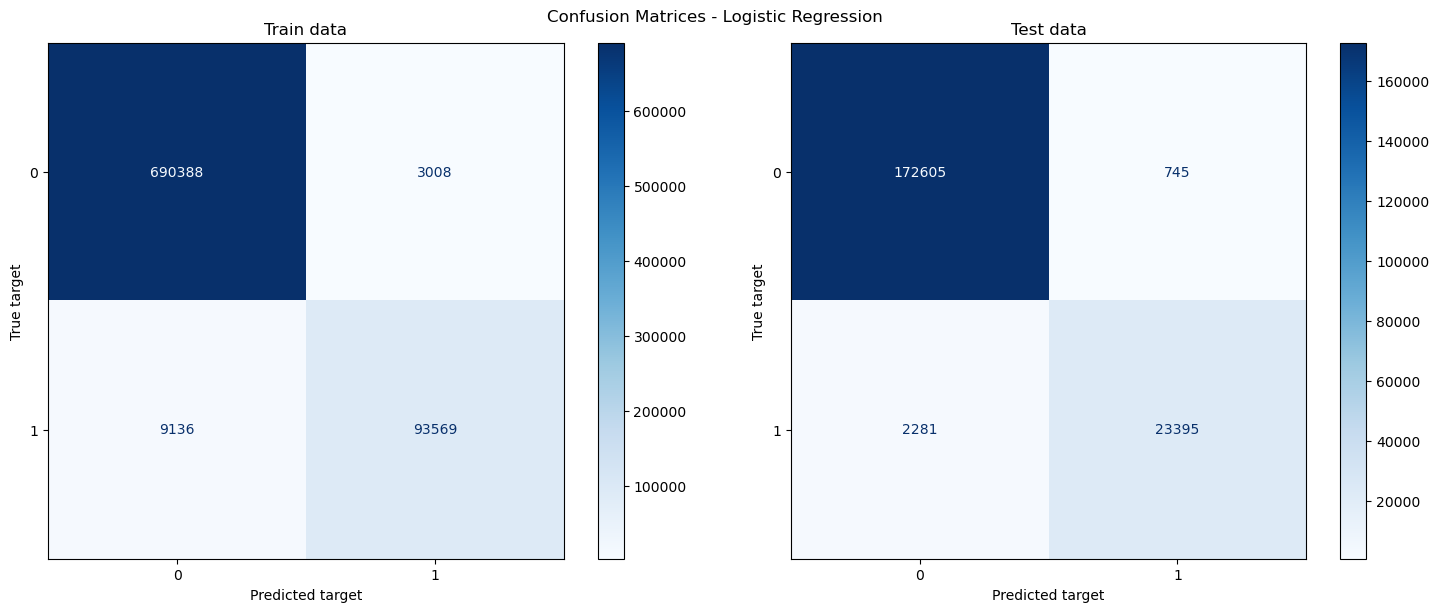

Train data:
Precision: 0.97
Recall score: 0.91
F1-score: 0.94


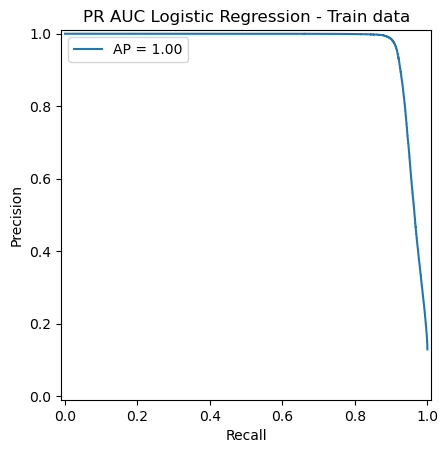


Test data:
Precision: 0.97
Recall score: 0.91
F1-score: 0.94


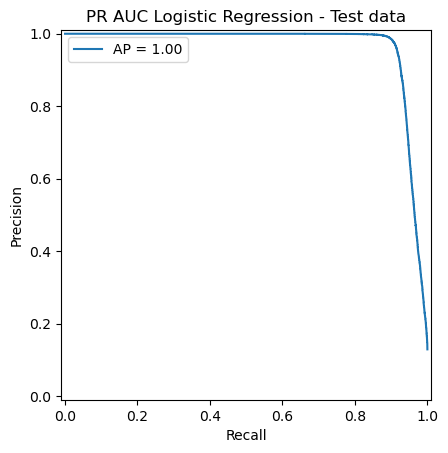

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, \
    f1_score, precision_recall_curve, PrecisionRecallDisplay

def display_confusion_matrix(y_train, y_train_pred, y_test, y_pred, title='', cmap='cividis'):
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=[0, 1])
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1])

    cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    cms_disp = [cm_train_disp, cm_test_disp]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)); axes = axes.flatten();
    for i, (ax, cm) in enumerate(zip(axes, cms_disp)):
        cm.plot(ax=ax, cmap=cmap)
        cm_title = 'Train data' if i == 0 else 'Test data'
        ax.set_xlabel('Predicted target')
        ax.set_ylabel('True target')
        ax.set_title(cm_title)
    fig.suptitle(t=title)
    plt.tight_layout()
    plt.show()
    return cm_train, cm_test

def display_quality_metrics(y_true, y_pred, y_probs, label='Test data', pr_curve_title=''):
    print(f"{label}:")
    print(f"Precision: {precision_score(y_true=y_true, y_pred=y_pred):.2f}")
    print(f"Recall score: {recall_score(y_true=y_true, y_pred=y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true=y_true, y_pred=y_pred):.2f}")
    precisions, recalls, _ = precision_recall_curve(y_true=y_true, probas_pred=y_probs[:, 1])
    pr_curve_disp = PrecisionRecallDisplay(precision=precisions, recall=recalls, average_precision=True)
    pr_curve_disp.plot()
    plt.title(pr_curve_title)
    plt.legend()
    plt.show()

cm_train_LR, cm_test_LR = display_confusion_matrix(y_train=y_train, y_train_pred=y_train_pred, 
                                             y_test=y_test, y_pred=y_pred, 
                                             title='Confusion Matrices - Logistic Regression', cmap='Blues')
display_quality_metrics(y_true=y_train, 
                        y_pred=y_train_pred, 
                        y_probs=y_train_probs, 
                        label='Train data', 
                        pr_curve_title='PR AUC Logistic Regression - Train data')
display_quality_metrics(y_true=y_test, 
                        y_pred=y_pred, 
                        y_probs=y_probs,
                        label='\nTest data',
                        pr_curve_title='PR AUC Logistic Regression - Test data')

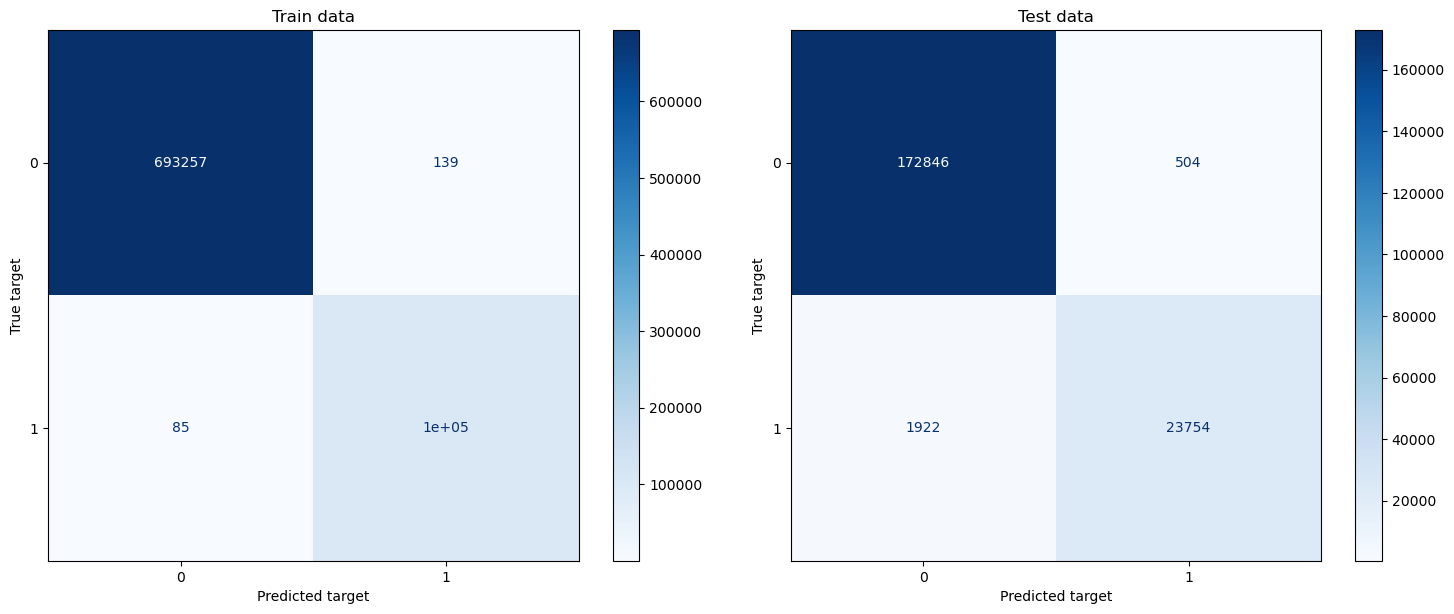

Train data:
Precision: 1.00
Recall score: 1.00
F1-score: 1.00


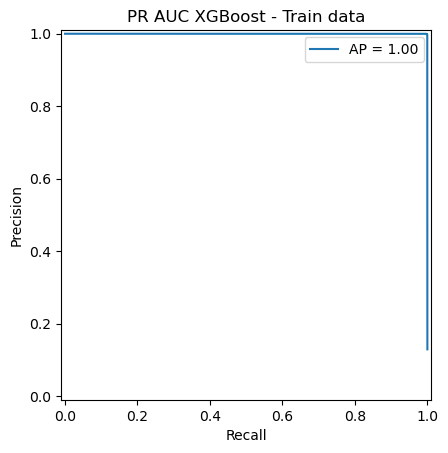


Test data:
Precision: 0.98
Recall score: 0.93
F1-score: 0.95


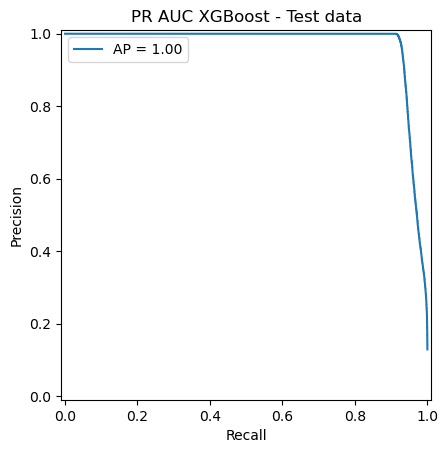

In [44]:
import time
import xgboost as xgb

# Prepare data for XGBoost
X = customer_data.drop(columns='target')
y = customer_data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['target'])

val_counts = customer_data['target'].value_counts()
class_freq_ratio = val_counts.get(0, 0) / val_counts.get(1, 0)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=1000,
    scale_pos_weight=class_freq_ratio
)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

xgb_model.fit(X_train, y_train)
y_pred_XGB_train = xgb_model.predict(X_train)
y_pred_XGB_test = xgb_model.predict(X_test)

cm_train_XGB, cm_test_XGB = display_confusion_matrix(y_train=y_train, y_train_pred=y_pred_XGB_train,
                                                     y_test=y_test, y_pred=y_pred_XGB_test, cmap="Blues")
display_quality_metrics(y_true=y_train,
                        y_pred=y_pred_XGB_train,
                        y_probs=xgb_model.predict_proba(X_train),
                        label='Train data',
                        pr_curve_title='PR AUC XGBoost - Train data')
display_quality_metrics(y_true=y_test,
                        y_pred=y_pred_XGB_test,
                        y_probs=xgb_model.predict_proba(X_test),
                        label='\nTest data',            
                        pr_curve_title='PR AUC XGBoost - Test data')